In [1]:
#LAST MODEL ACCURACY ABOUT 90%
#MAJOR JUMP NOTICED WHEN LR WAS REDUCED AND FILTER SIZE INCREASED
#ANOTHER JUMP WHEN MORE CONV2D AND DENSE LAYER ADDED



import tensorflow as tf

# Check for GPU availability
gpus = tf.config.list_physical_devices('GPU')
if gpus:
    print(f"GPUs available: {[gpu.name for gpu in gpus]}")
else:
    print("No GPUs found. Please enable GPU in the Runtime settings.")


GPUs available: ['/physical_device:GPU:0']


Streaming output truncated to the last 5000 lines.
food-101/images/cannoli/3280540.jpg
food-101/images/cannoli/2699401.jpg
food-101/images/cannoli/663332.jpg
food-101/images/cannoli/1387486.jpg
food-101/images/cannoli/3123542.jpg
food-101/images/cannoli/370840.jpg
food-101/images/cannoli/3669445.jpg
food-101/images/cannoli/446479.jpg
food-101/images/cannoli/1087098.jpg
food-101/images/cannoli/1456962.jpg
food-101/images/cannoli/2540585.jpg
food-101/images/cannoli/2191429.jpg
food-101/images/cannoli/3659976.jpg
food-101/images/cannoli/1019714.jpg
food-101/images/cannoli/1772271.jpg
food-101/images/cannoli/3192632.jpg
food-101/images/cannoli/1779338.jpg
food-101/images/cannoli/1975469.jpg
food-101/images/cannoli/3803772.jpg
food-101/images/cannoli/1424651.jpg
food-101/images/cannoli/3099943.jpg
food-101/images/cannoli/2407618.jpg
food-101/images/cannoli/2100962.jpg
food-101/images/cannoli/3308008.jpg
food-101/images/cannoli/3523308.jpg
food-101/images/cannoli/2439722.jpg
food-101/images/

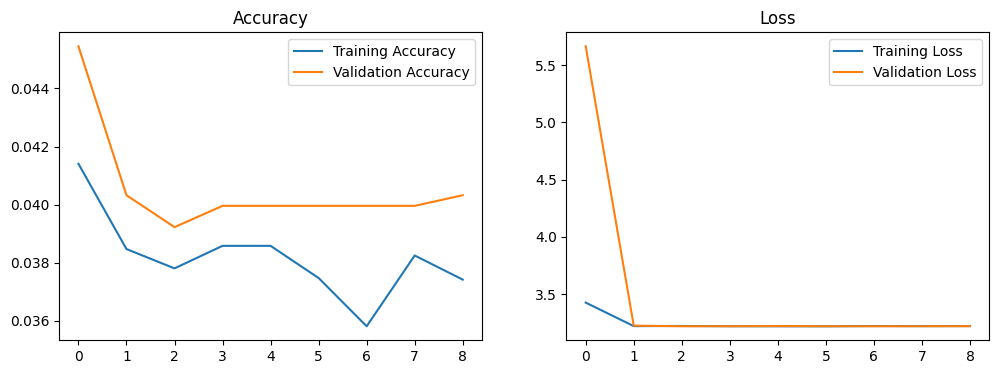

85/85 [==============================] - 12s 140ms/step


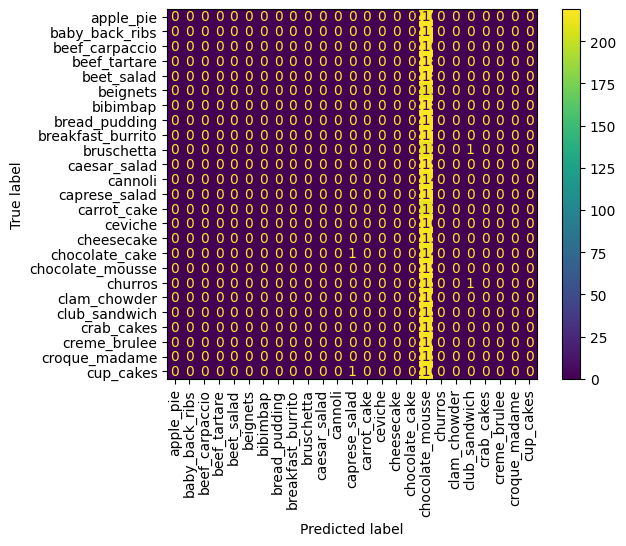

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/keras/src/engine/trainin

                   precision    recall  f1-score   support

        apple_pie       0.00      0.00      0.00       216
   baby_back_ribs       0.00      0.00      0.00       217
   beef_carpaccio       0.00      0.00      0.00       216
     beef_tartare       0.00      0.00      0.00       218
       beet_salad       0.00      0.00      0.00       218
         beignets       0.00      0.00      0.00       213
         bibimbap       0.00      0.00      0.00       218
    bread_pudding       0.00      0.00      0.00       217
breakfast_burrito       0.00      0.00      0.00       217
       bruschetta       0.00      0.00      0.00       213
     caesar_salad       0.00      0.00      0.00       219
          cannoli       0.00      0.00      0.00       214
    caprese_salad       0.00      0.00      0.00       217
      carrot_cake       0.00      0.00      0.00       211
          ceviche       0.00      0.00      0.00       216
       cheesecake       0.00      0.00      0.00       

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [3]:
# Import necessary libraries
import os
import numpy as np
import shutil
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam

# Mount Google Drive to access the uploaded dataset
from google.colab import drive
drive.mount('/content/drive')

# Define the path where the dataset is stored
dataset_path = "/content/drive/My Drive/food-101.tar"

# Extract the dataset tar file to /content/ directory
!tar -xvf "/content/drive/My Drive/food-101.tar" -C /content/

# Define the dataset path and parameters
DATASET_PATH = '/content/food-101/images'
IMAGE_SIZE = (128, 128)  # Reduced image size for faster computation
BATCH_SIZE = 64
CLASSES = [
    'apple_pie', 'baby_back_ribs', 'beef_carpaccio', 'beef_tartare',
    'beet_salad', 'beignets', 'bibimbap', 'bread_pudding', 'breakfast_burrito',
    'bruschetta', 'caesar_salad', 'cannoli', 'caprese_salad', 'carrot_cake',
    'ceviche', 'cheesecake', 'chocolate_cake', 'chocolate_mousse', 'churros',
    'clam_chowder', 'club_sandwich', 'crab_cakes', 'creme_brulee', 'croque_madame',
    'cup_cakes'
]

# Create directories for the split datasets
train_dir = '/content/food-101/train'
val_dir = '/content/food-101/val'
test_dir = '/content/food-101/test'

# Function to create directories if they do not exist
def create_directory(directory):
    if not os.path.exists(directory):
        os.makedirs(directory)

# Create train, validation, and test directories
create_directory(train_dir)
create_directory(val_dir)
create_directory(test_dir)

# Split dataset into train, validation, and test sets
for class_name in CLASSES:
    class_path = os.path.join(DATASET_PATH, class_name)
    images = os.listdir(class_path)
    np.random.shuffle(images)

    total_images = len(images)
    # Use fewer images per class for faster training
    #max_images = 100  # Limit to 100 images per class for this example
    #images = images[:max_images]

    train_split = int(0.7 * len(images))
    val_split = int(0.1 * len(images))
    test_split = int(0.2 * len(images))

    train_images = images[:train_split]
    val_images = images[train_split:train_split + val_split]
    test_images = images[train_split + val_split:]

    for img in train_images:
        create_directory(os.path.join(train_dir, class_name))
        shutil.copy(os.path.join(class_path, img), os.path.join(train_dir, class_name, img))

    for img in val_images:
        create_directory(os.path.join(val_dir, class_name))
        shutil.copy(os.path.join(class_path, img), os.path.join(val_dir, class_name, img))

    for img in test_images:
        create_directory(os.path.join(test_dir, class_name))
        shutil.copy(os.path.join(class_path, img), os.path.join(test_dir, class_name, img))

# Define ImageDataGenerators for train, validation, and test datasets
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Training data generator
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    classes=CLASSES
)

# Validation data generator
val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    classes=CLASSES
)

# Test data generator
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    classes=CLASSES,
    shuffle=False
)

# Building the hand-made CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', padding='same',input_shape=(IMAGE_SIZE[0], IMAGE_SIZE[1], 3)),
    MaxPooling2D(pool_size=(2, 2)),
    BatchNormalization(),
    Conv2D(64, (3, 3), padding='same', activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    BatchNormalization(),
    Conv2D(128, (3, 3), padding='same',activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    BatchNormalization(),
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(len(CLASSES), activation='softmax')
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.01), loss='categorical_crossentropy', metrics=['accuracy'])

# Print model summary
model.summary()

# Use early stopping to prevent overfitting
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Train the model
history = model.fit(
    train_generator,
    epochs=15,
    validation_data=val_generator,
    callbacks=[early_stopping]
)

# Evaluate the Model on test data
test_loss, test_accuracy = model.evaluate(test_generator)
print(f'Test Loss: {test_loss:.4f}')
print(f'Test Accuracy: {test_accuracy:.4f}')

# Evaluate the Model
# Plot training and validation accuracy and loss
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss')
plt.show()

# Confusion matrix
val_preds = model.predict(test_generator)
val_preds_classes = np.argmax(val_preds, axis=1)
true_classes = test_generator.classes
class_labels = list(test_generator.class_indices.keys())

cm = confusion_matrix(true_classes, val_preds_classes)
cmd = ConfusionMatrixDisplay(cm, display_labels=class_labels)
cmd.plot()
plt.xticks(rotation=90)
plt.show()

# Classification report
print(classification_report(true_classes, val_preds_classes, target_names=class_labels))

# Save the model
model.save('food101_cnn_model.h5')

# Download the model
from google.colab import files
files.download('food101_cnn_model.h5')


Streaming output truncated to the last 5000 lines.
food-101/images/cannoli/3659976.jpg
food-101/images/cannoli/1019714.jpg
food-101/images/cannoli/1772271.jpg
food-101/images/cannoli/3192632.jpg
food-101/images/cannoli/1779338.jpg
food-101/images/cannoli/1975469.jpg
food-101/images/cannoli/3803772.jpg
food-101/images/cannoli/1424651.jpg
food-101/images/cannoli/3099943.jpg
food-101/images/cannoli/2407618.jpg
food-101/images/cannoli/2100962.jpg
food-101/images/cannoli/3308008.jpg
food-101/images/cannoli/3523308.jpg
food-101/images/cannoli/2439722.jpg
food-101/images/cannoli/1282001.jpg
food-101/images/cannoli/3898017.jpg
food-101/images/cannoli/1340566.jpg
food-101/images/cannoli/754677.jpg
food-101/images/cannoli/1358599.jpg
food-101/images/cannoli/3653631.jpg
food-101/images/cannoli/1806725.jpg
food-101/images/cannoli/1357673.jpg
food-101/images/cannoli/3631205.jpg
food-101/images/cannoli/3106000.jpg
food-101/images/cannoli/471785.jpg
food-101/images/cannoli/1880934.jpg
food-101/images

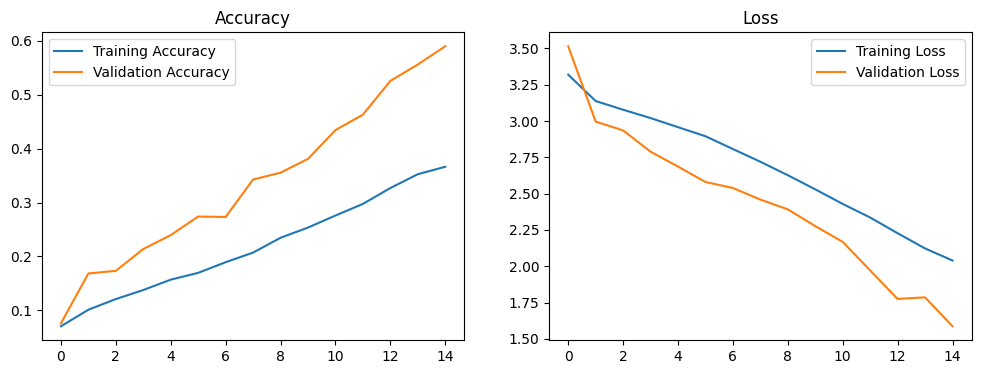

146/146 [==============================] - 22s 148ms/step


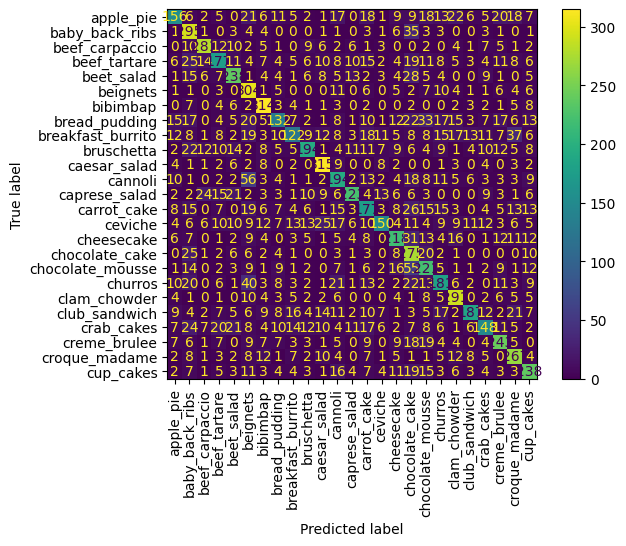

                   precision    recall  f1-score   support

        apple_pie       0.58      0.41      0.48       378
   baby_back_ribs       0.54      0.81      0.65       366
   beef_carpaccio       0.78      0.76      0.77       370
     beef_tartare       0.55      0.46      0.50       383
       beet_salad       0.64      0.64      0.64       370
         beignets       0.52      0.80      0.63       378
         bibimbap       0.72      0.85      0.78       370
    bread_pudding       0.53      0.35      0.42       373
breakfast_burrito       0.54      0.33      0.41       373
       bruschetta       0.66      0.52      0.58       376
     caesar_salad       0.73      0.84      0.78       373
          cannoli       0.50      0.53      0.52       363
    caprese_salad       0.74      0.60      0.66       372
      carrot_cake       0.48      0.47      0.48       373
          ceviche       0.66      0.40      0.50       372
       cheesecake       0.62      0.58      0.60       

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [4]:
#reduced learning rate to one tenth of original and used bigger filters
# Import necessary libraries
import os
import numpy as np
import shutil
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam

# Mount Google Drive to access the uploaded dataset
from google.colab import drive
drive.mount('/content/drive')

# Define the path where the dataset is stored
dataset_path = "/content/drive/My Drive/food-101.tar"

# Extract the dataset tar file to /content/ directory
!tar -xvf "/content/drive/My Drive/food-101.tar" -C /content/

# Define the dataset path and parameters
DATASET_PATH = '/content/food-101/images'
IMAGE_SIZE = (128, 128)  # Reduced image size for faster computation
BATCH_SIZE = 64
CLASSES = [
    'apple_pie', 'baby_back_ribs', 'beef_carpaccio', 'beef_tartare',
    'beet_salad', 'beignets', 'bibimbap', 'bread_pudding', 'breakfast_burrito',
    'bruschetta', 'caesar_salad', 'cannoli', 'caprese_salad', 'carrot_cake',
    'ceviche', 'cheesecake', 'chocolate_cake', 'chocolate_mousse', 'churros',
    'clam_chowder', 'club_sandwich', 'crab_cakes', 'creme_brulee', 'croque_madame',
    'cup_cakes'
]

# Create directories for the split datasets
train_dir = '/content/food-101/train'
val_dir = '/content/food-101/val'
test_dir = '/content/food-101/test'

# Function to create directories if they do not exist
def create_directory(directory):
    if not os.path.exists(directory):
        os.makedirs(directory)

# Create train, validation, and test directories
create_directory(train_dir)
create_directory(val_dir)
create_directory(test_dir)

# Split dataset into train, validation, and test sets
for class_name in CLASSES:
    class_path = os.path.join(DATASET_PATH, class_name)
    images = os.listdir(class_path)
    np.random.shuffle(images)

    total_images = len(images)
    # Use fewer images per class for faster training
    #max_images = 100  # Limit to 100 images per class for this example
    #images = images[:max_images]

    train_split = int(0.7 * len(images))
    val_split = int(0.1 * len(images))
    test_split = int(0.2 * len(images))

    train_images = images[:train_split]
    val_images = images[train_split:train_split + val_split]
    test_images = images[train_split + val_split:]

    for img in train_images:
        create_directory(os.path.join(train_dir, class_name))
        shutil.copy(os.path.join(class_path, img), os.path.join(train_dir, class_name, img))

    for img in val_images:
        create_directory(os.path.join(val_dir, class_name))
        shutil.copy(os.path.join(class_path, img), os.path.join(val_dir, class_name, img))

    for img in test_images:
        create_directory(os.path.join(test_dir, class_name))
        shutil.copy(os.path.join(class_path, img), os.path.join(test_dir, class_name, img))

# Define ImageDataGenerators for train, validation, and test datasets
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Training data generator
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    classes=CLASSES
)

# Validation data generator
val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    classes=CLASSES
)

# Test data generator
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    classes=CLASSES,
    shuffle=False
)

# Building the hand-made CNN model
model = Sequential([
    Conv2D(32, (7, 7), activation='relu', padding='same',input_shape=(IMAGE_SIZE[0], IMAGE_SIZE[1], 3)),
    MaxPooling2D(pool_size=(2, 2)),
    BatchNormalization(),
    Conv2D(64, (7, 7), padding='same', activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    BatchNormalization(),
    Conv2D(128, (5, 5), padding='same',activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    BatchNormalization(),
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.7),
    Dense(len(CLASSES), activation='softmax')
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# Print model summary
model.summary()

# Use early stopping to prevent overfitting
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Train the model
history = model.fit(
    train_generator,
    epochs=15,
    validation_data=val_generator,
    callbacks=[early_stopping]
)

# Evaluate the Model on test data
test_loss, test_accuracy = model.evaluate(test_generator)
print(f'Test Loss: {test_loss:.4f}')
print(f'Test Accuracy: {test_accuracy:.4f}')

# Evaluate the Model
# Plot training and validation accuracy and loss
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss')
plt.show()

# Confusion matrix
val_preds = model.predict(test_generator)
val_preds_classes = np.argmax(val_preds, axis=1)
true_classes = test_generator.classes
class_labels = list(test_generator.class_indices.keys())

cm = confusion_matrix(true_classes, val_preds_classes)
cmd = ConfusionMatrixDisplay(cm, display_labels=class_labels)
cmd.plot()
plt.xticks(rotation=90)
plt.show()

# Classification report
print(classification_report(true_classes, val_preds_classes, target_names=class_labels))

# Save the model
model.save('food101_cnn_model.h5')

# Download the model
from google.colab import files
files.download('food101_cnn_model.h5')


In [5]:
#added more conv2d layers and dense layers reducing learning rate for fast execution increasing epoch for more training
# Import necessary libraries
import os
import numpy as np
import shutil
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam

# Mount Google Drive to access the uploaded dataset
from google.colab import drive
drive.mount('/content/drive')

# Define the path where the dataset is stored
dataset_path = "/content/drive/My Drive/food-101.tar"

# Extract the dataset tar file to /content/ directory
!tar -xvf "/content/drive/My Drive/food-101.tar" -C /content/

# Define the dataset path and parameters
DATASET_PATH = '/content/food-101/images'
IMAGE_SIZE = (128, 128)  # Reduced image size for faster computation
BATCH_SIZE = 64  # Changed batch size
CLASSES = [
    'apple_pie', 'baby_back_ribs', 'beef_carpaccio', 'beef_tartare',
    'beet_salad', 'beignets', 'bibimbap', 'bread_pudding', 'breakfast_burrito',
    'bruschetta', 'caesar_salad', 'cannoli', 'caprese_salad', 'carrot_cake',
    'ceviche', 'cheesecake', 'chocolate_cake', 'chocolate_mousse', 'churros',
    'clam_chowder', 'club_sandwich', 'crab_cakes', 'creme_brulee', 'croque_madame',
    'cup_cakes'
]

# Create directories for the split datasets
train_dir = '/content/food-101/train'
val_dir = '/content/food-101/val'
test_dir = '/content/food-101/test'

# Function to create directories if they do not exist
def create_directory(directory):
    if not os.path.exists(directory):
        os.makedirs(directory)

# Create train, validation, and test directories
create_directory(train_dir)
create_directory(val_dir)
create_directory(test_dir)

# Split dataset into train, validation, and test sets
for class_name in CLASSES:
    class_path = os.path.join(DATASET_PATH, class_name)
    images = os.listdir(class_path)
    np.random.shuffle(images)

    # Use all available images per class
    train_split = int(0.7 * len(images))
    val_split = int(0.1 * len(images))
    test_split = int(0.2 * len(images))

    train_images = images[:train_split]
    val_images = images[train_split:train_split + val_split]
    test_images = images[train_split + val_split:]

    for img in train_images:
        create_directory(os.path.join(train_dir, class_name))
        shutil.copy(os.path.join(class_path, img), os.path.join(train_dir, class_name, img))

    for img in val_images:
        create_directory(os.path.join(val_dir, class_name))
        shutil.copy(os.path.join(class_path, img), os.path.join(val_dir, class_name, img))

    for img in test_images:
        create_directory(os.path.join(test_dir, class_name))
        shutil.copy(os.path.join(class_path, img), os.path.join(test_dir, class_name, img))

# Define ImageDataGenerators for train, validation, and test datasets
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Training data generator
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    classes=CLASSES
)

# Validation data generator
val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    classes=CLASSES
)

# Test data generator
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    classes=CLASSES,
    shuffle=False
)

# Building the improved CNN model with additional layers and modified parameters
model = Sequential([
    Conv2D(32, (7, 7), padding='same', activation='relu', input_shape=(IMAGE_SIZE[0], IMAGE_SIZE[1], 3)),
    MaxPooling2D(pool_size=(2, 2)),
    BatchNormalization(),
    Conv2D(64, (7, 7), padding='same', activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    BatchNormalization(),
    Conv2D(128, (7, 7), padding='same', activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    BatchNormalization(),
    Conv2D(256, (7, 7), padding='same', activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    BatchNormalization(),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(len(CLASSES), activation='softmax')
])

# Compile the model with a lower learning rate
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Print model summary
model.summary()

# Use early stopping to prevent overfitting
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=4, restore_best_weights=True)

# Train the model
history = model.fit(
    train_generator,
    epochs=20,
    validation_data=val_generator,
    callbacks=[early_stopping]
)

# Evaluate the Model on test data
test_loss, test_accuracy = model.evaluate(test_generator)
print(f'Test Loss: {test_loss:.4f}')
print(f'Test Accuracy: {test_accuracy:.4f}')

# Evaluate the Model
# Plot training and validation accuracy and loss
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss')
plt.show()

# Confusion matrix
val_preds = model.predict(test_generator)
val_preds_classes = np.argmax(val_preds, axis=1)
true_classes = test_generator.classes
class_labels = list(test_generator.class_indices.keys())

cm = confusion_matrix(true_classes, val_preds_classes)
cmd = ConfusionMatrixDisplay(cm, display_labels=class_labels)
cmd.plot()
plt.xticks(rotation=90)
plt.show()

# Classification report
print(classification_report(true_classes, val_preds_classes, target_names=class_labels))

# Save the model
model.save('food101_cnn_model_updated.h5')

# Download the model
from google.colab import files
files.download('food101_cnn_model_updated.h5')


Streaming output truncated to the last 5000 lines.
food-101/images/cannoli/663332.jpg
food-101/images/cannoli/1387486.jpg
food-101/images/cannoli/3123542.jpg
food-101/images/cannoli/370840.jpg
food-101/images/cannoli/3669445.jpg
food-101/images/cannoli/446479.jpg
food-101/images/cannoli/1087098.jpg
food-101/images/cannoli/1456962.jpg
food-101/images/cannoli/2540585.jpg
food-101/images/cannoli/2191429.jpg
food-101/images/cannoli/3659976.jpg
food-101/images/cannoli/1019714.jpg
food-101/images/cannoli/1772271.jpg
food-101/images/cannoli/3192632.jpg
food-101/images/cannoli/1779338.jpg
food-101/images/cannoli/1975469.jpg
food-101/images/cannoli/3803772.jpg
food-101/images/cannoli/1424651.jpg
food-101/images/cannoli/3099943.jpg
food-101/images/cannoli/2407618.jpg
food-101/images/cannoli/2100962.jpg
food-101/images/cannoli/3308008.jpg
food-101/images/cannoli/3523308.jpg
food-101/images/cannoli/2439722.jpg
food-101/images/cannoli/1282001.jpg
food-101/images/cannoli/3898017.jpg
food-101/images/

KeyboardInterrupt: 

In [6]:
#In last model accuracy was improving slowly so terminated in middle and learning rate restored to 0.0001
# Import necessary libraries
import os
import numpy as np
import shutil
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam

# Mount Google Drive to access the uploaded dataset
from google.colab import drive
drive.mount('/content/drive')

# Define the path where the dataset is stored
dataset_path = "/content/drive/My Drive/food-101.tar"

# Extract the dataset tar file to /content/ directory
!tar -xvf "/content/drive/My Drive/food-101.tar" -C /content/

# Define the dataset path and parameters
DATASET_PATH = '/content/food-101/images'
IMAGE_SIZE = (128, 128)  # Reduced image size for faster computation
BATCH_SIZE = 64  # Changed batch size
CLASSES = [
    'apple_pie', 'baby_back_ribs', 'beef_carpaccio', 'beef_tartare',
    'beet_salad', 'beignets', 'bibimbap', 'bread_pudding', 'breakfast_burrito',
    'bruschetta', 'caesar_salad', 'cannoli', 'caprese_salad', 'carrot_cake',
    'ceviche', 'cheesecake', 'chocolate_cake', 'chocolate_mousse', 'churros',
    'clam_chowder', 'club_sandwich', 'crab_cakes', 'creme_brulee', 'croque_madame',
    'cup_cakes'
]

# Create directories for the split datasets
train_dir = '/content/food-101/train'
val_dir = '/content/food-101/val'
test_dir = '/content/food-101/test'

# Function to create directories if they do not exist
def create_directory(directory):
    if not os.path.exists(directory):
        os.makedirs(directory)

# Create train, validation, and test directories
create_directory(train_dir)
create_directory(val_dir)
create_directory(test_dir)

# Split dataset into train, validation, and test sets
for class_name in CLASSES:
    class_path = os.path.join(DATASET_PATH, class_name)
    images = os.listdir(class_path)
    np.random.shuffle(images)

    # Use all available images per class
    train_split = int(0.7 * len(images))
    val_split = int(0.1 * len(images))
    test_split = int(0.2 * len(images))

    train_images = images[:train_split]
    val_images = images[train_split:train_split + val_split]
    test_images = images[train_split + val_split:]

    for img in train_images:
        create_directory(os.path.join(train_dir, class_name))
        shutil.copy(os.path.join(class_path, img), os.path.join(train_dir, class_name, img))

    for img in val_images:
        create_directory(os.path.join(val_dir, class_name))
        shutil.copy(os.path.join(class_path, img), os.path.join(val_dir, class_name, img))

    for img in test_images:
        create_directory(os.path.join(test_dir, class_name))
        shutil.copy(os.path.join(class_path, img), os.path.join(test_dir, class_name, img))

# Define ImageDataGenerators for train, validation, and test datasets
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Training data generator
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    classes=CLASSES
)

# Validation data generator
val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    classes=CLASSES
)

# Test data generator
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    classes=CLASSES,
    shuffle=False
)

# Building the improved CNN model with additional layers and modified parameters
model = Sequential([
    Conv2D(32, (5, 5), padding='same', activation='relu', input_shape=(IMAGE_SIZE[0], IMAGE_SIZE[1], 3)),
    MaxPooling2D(pool_size=(2, 2)),
    BatchNormalization(),
    Conv2D(64, (5, 5), padding='same', activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    BatchNormalization(),
    Conv2D(128, (7, 7), padding='same', activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    BatchNormalization(),
    Conv2D(256, (7, 7), padding='same', activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    BatchNormalization(),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.65),
    Dense(256, activation='relu'),
    Dropout(0.62),
    Dense(len(CLASSES), activation='softmax')
])

# Compile the model with a lower learning rate
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# Print model summary
model.summary()

# Use early stopping to prevent overfitting
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=4, restore_best_weights=True)

# Train the model
history = model.fit(
    train_generator,
    epochs=20,
    validation_data=val_generator,
    callbacks=[early_stopping]
)

# Evaluate the Model on test data
test_loss, test_accuracy = model.evaluate(test_generator)
print(f'Test Loss: {test_loss:.4f}')
print(f'Test Accuracy: {test_accuracy:.4f}')

# Evaluate the Model
# Plot training and validation accuracy and loss
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss')
plt.show()

# Confusion matrix
val_preds = model.predict(test_generator)
val_preds_classes = np.argmax(val_preds, axis=1)
true_classes = test_generator.classes
class_labels = list(test_generator.class_indices.keys())

cm = confusion_matrix(true_classes, val_preds_classes)
cmd = ConfusionMatrixDisplay(cm, display_labels=class_labels)
cmd.plot()
plt.xticks(rotation=90)
plt.show()

# Classification report
print(classification_report(true_classes, val_preds_classes, target_names=class_labels))

# Save the model
model.save('food101_cnn_model_updated.h5')

# Download the model
from google.colab import files
files.download('food101_cnn_model_updated.h5')


Streaming output truncated to the last 5000 lines.
food-101/images/cannoli/1282001.jpg
food-101/images/cannoli/3898017.jpg
food-101/images/cannoli/1340566.jpg
food-101/images/cannoli/754677.jpg
food-101/images/cannoli/1358599.jpg
food-101/images/cannoli/3653631.jpg
food-101/images/cannoli/1806725.jpg
food-101/images/cannoli/1357673.jpg
food-101/images/cannoli/3631205.jpg
food-101/images/cannoli/3106000.jpg
food-101/images/cannoli/471785.jpg
food-101/images/cannoli/1880934.jpg
food-101/images/cannoli/1047167.jpg
food-101/images/cannoli/2866470.jpg
food-101/images/cannoli/2859528.jpg
food-101/images/cannoli/1185937.jpg
food-101/images/cannoli/329333.jpg
food-101/images/cannoli/630128.jpg
food-101/images/cannoli/3676695.jpg
food-101/images/cannoli/2516298.jpg
food-101/images/cannoli/2682978.jpg
food-101/images/cannoli/519926.jpg
food-101/images/cannoli/2057800.jpg
food-101/images/cannoli/795526.jpg
food-101/images/cannoli/2742332.jpg
food-101/images/cannoli/20077.jpg
food-101/images/canno

KeyboardInterrupt: 

Streaming output truncated to the last 5000 lines.
Found 24997 images belonging to 25 classes.
Found 13316 images belonging to 25 classes.
Found 20082 images belonging to 25 classes.
Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_33 (Conv2D)          (None, 128, 128, 32)      896       
                                                                 
 max_pooling2d_33 (MaxPooli  (None, 64, 64, 32)        0         
 ng2D)                                                           
                                                                 
 batch_normalization_33 (Ba  (None, 64, 64, 32)        128       
 tchNormalization)                                               
                                                                 
 conv2d_34 (Conv2D)          (None, 64, 64, 64)        18496     
                                                                 
 ma

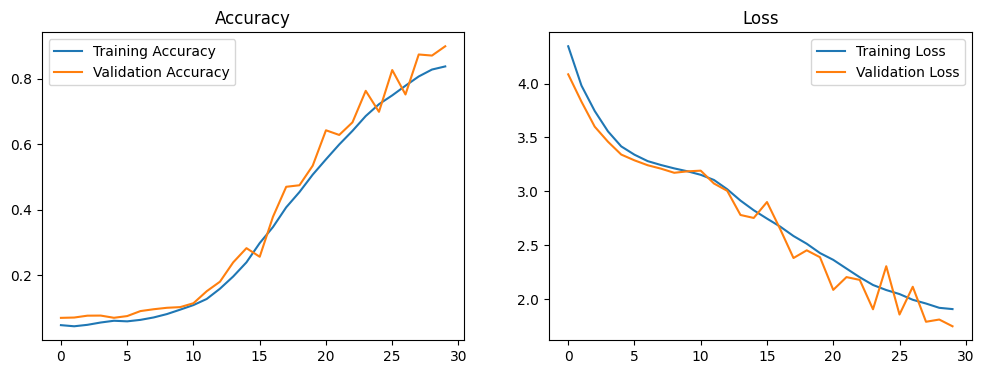

314/314 [==============================] - 47s 150ms/step


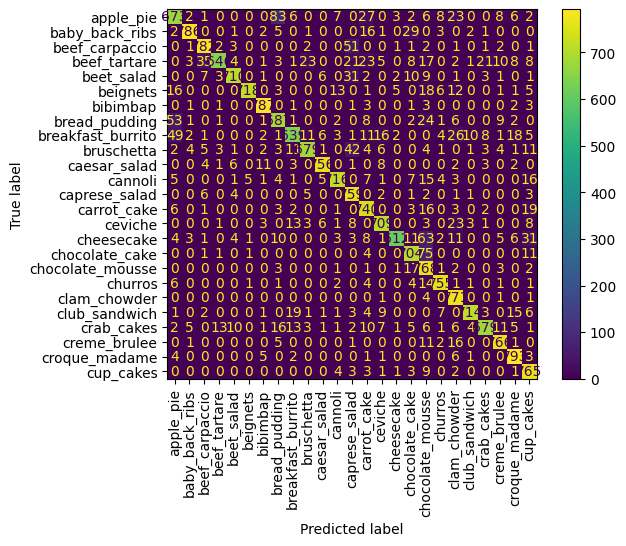

                   precision    recall  f1-score   support

        apple_pie       0.82      0.79      0.80       857
   baby_back_ribs       0.97      0.93      0.95       849
   beef_carpaccio       0.92      0.92      0.92       850
     beef_tartare       0.96      0.77      0.85       840
       beet_salad       0.95      0.90      0.93       787
         beignets       0.99      0.90      0.94       799
         bibimbap       0.96      0.98      0.97       803
    bread_pudding       0.83      0.86      0.85       798
breakfast_burrito       0.90      0.78      0.84       816
       bruschetta       0.93      0.86      0.90       788
     caesar_salad       0.97      0.95      0.96       797
          cannoli       0.95      0.91      0.93       791
    caprese_salad       0.82      0.97      0.89       784
      carrot_cake       0.84      0.93      0.88       796
          ceviche       0.92      0.91      0.91       782
       cheesecake       0.97      0.79      0.87       

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [14]:
import os
import numpy as np
import shutil
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2

# Mount Google Drive to access the uploaded dataset
from google.colab import drive
drive.mount('/content/drive')

# Path to the dataset archive file
dataset_path = "/content/drive/My Drive/food-101.tar"

# Extract the dataset tar file to /content/ directory
!tar -xvf "/content/drive/My Drive/food-101.tar" -C /content/

# Dataset directories
DATASET_PATH = '/content/food-101/images'
IMAGE_SIZE = (128, 128)  # Reduced image size for faster computation
BATCH_SIZE = 64  # Batch size for training
CLASSES = [
    'apple_pie', 'baby_back_ribs', 'beef_carpaccio', 'beef_tartare',
    'beet_salad', 'beignets', 'bibimbap', 'bread_pudding', 'breakfast_burrito',
    'bruschetta', 'caesar_salad', 'cannoli', 'caprese_salad', 'carrot_cake',
    'ceviche', 'cheesecake', 'chocolate_cake', 'chocolate_mousse', 'churros',
    'clam_chowder', 'club_sandwich', 'crab_cakes', 'creme_brulee', 'croque_madame',
    'cup_cakes'
]

# Directories for train, validation, and test data
train_dir = '/content/food-101/train'
val_dir = '/content/food-101/val'
test_dir = '/content/food-101/test'

# Function to create directories if they do not exist
def create_directory(directory):
    if not os.path.exists(directory):
        os.makedirs(directory)

# Create train, validation, and test directories if they don't exist
create_directory(train_dir)
create_directory(val_dir)
create_directory(test_dir)

# Function to copy a subset of images to destination directory
def copy_subset_images(class_name, images, source_dir, dest_dir):
    for img in images:
        src_path = os.path.join(source_dir, class_name, img)
        dest_path = os.path.join(dest_dir, class_name, img)
        if os.path.exists(src_path):
            create_directory(os.path.dirname(dest_path))
            shutil.copy(src_path, dest_path)
        else:
            print(f"Warning: File {src_path} does not exist.")

# Split dataset into train, validation, and test sets with a subset
for class_name in CLASSES:
    class_path = os.path.join(DATASET_PATH, class_name)
    images = os.listdir(class_path)
    np.random.shuffle(images)

    # Use a subset of images per class
    subset_size = min(100, len(images))  # Limiting to 500 images per class
    train_split = int(0.7 * subset_size)
    val_split = int(0.1 * subset_size)
    test_split = int(0.2 * subset_size)

    train_images = images[:train_split]
    val_images = images[train_split:train_split + val_split]
    test_images = images[train_split + val_split:]

    copy_subset_images(class_name, train_images, class_path, train_dir)
    copy_subset_images(class_name, val_images, class_path, val_dir)
    copy_subset_images(class_name, test_images, class_path, test_dir)

# ImageDataGenerators for train, validation, and test datasets
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Training data generator
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    classes=CLASSES
)

# Validation data generator
val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    classes=CLASSES
)

# Test data generator
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    classes=CLASSES,
    shuffle=False
)

# Improved CNN model with additional layers and regularization
model = Sequential([
    Conv2D(32, (3, 3), padding='same', activation='relu', kernel_regularizer=l2(0.001), input_shape=(IMAGE_SIZE[0], IMAGE_SIZE[1], 3)),
    MaxPooling2D(pool_size=(2, 2)),
    BatchNormalization(),
    Conv2D(64, (3, 3), padding='same', activation='relu', kernel_regularizer=l2(0.001)),
    MaxPooling2D(pool_size=(2, 2)),
    BatchNormalization(),
    Conv2D(128, (5, 5), padding='same', activation='relu', kernel_regularizer=l2(0.001)),
    MaxPooling2D(pool_size=(2, 2)),
    BatchNormalization(),
    Conv2D(256, (7, 7), padding='same', activation='relu', kernel_regularizer=l2(0.001)),
    MaxPooling2D(pool_size=(2, 2)),
    BatchNormalization(),
    Flatten(),
    Dense(256, activation='relu', kernel_regularizer=l2(0.001)),
    Dropout(0.5),
    Dense(128, activation='relu', kernel_regularizer=l2(0.001)),
    Dropout(0.5),
    Dense(len(CLASSES), activation='softmax')
])

# Compile the model with a lower learning rate
model.compile(optimizer=Adam(learning_rate=0.0005), loss='categorical_crossentropy', metrics=['accuracy'])

# Print model summary
model.summary()

# Early stopping to prevent overfitting
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=4, restore_best_weights=True)

# Train the model for 30 epochs
history = model.fit(
    train_generator,
    epochs=30,
    validation_data=val_generator,
    callbacks=[early_stopping]
)

# Evaluate the Model on test data
test_loss, test_accuracy = model.evaluate(test_generator)
print(f'Test Loss: {test_loss:.4f}')
print(f'Test Accuracy: {test_accuracy:.4f}')

# Plot training and validation accuracy and loss
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss')
plt.show()

# Confusion matrix
val_preds = model.predict(test_generator)
val_preds_classes = np.argmax(val_preds, axis=1)
true_classes = test_generator.classes
class_labels = list(test_generator.class_indices.keys())

cm = confusion_matrix(true_classes, val_preds_classes)
cmd = ConfusionMatrixDisplay(cm, display_labels=class_labels)
cmd.plot()
plt.xticks(rotation=90)
plt.show()

# Classification report
print(classification_report(true_classes, val_preds_classes, target_names=class_labels))

# Save the model
model.save('food101_cnn_model_improved.h5')

# Download the model
from google.colab import files
files.download('food101_cnn_model_improved.h5')
